# Pytof : A python library for time of flight neutron reflectivity instrumentations
A. Chennevière and D. Lairez\
*Université Paris Saclay, Laboratoire Léon Brillouin, CEA-CNRS, CEA SAclay, Gif sur Yvette France.*

The **pytof** python module allows to compute the exact resolution fucntion of time of flight neutron reflectometers and fit experimental data.
This library has been initially developped for the time of flight reflectometer HERMES at LLB but it can be used for any reflectometer using 1D detector and can be easely generalized to 2D detector data. This notebook aims to present some functionnalities of **pytof**.

The structure of this module matches the paper: https://arxiv.org/abs/1906.09577


In [35]:
# In order to interact with plots (zoom, rotation of 3D plot etc)
%matplotlib inline
# Import the library:
import pytof
import matplotlib.pyplot as plt

## 1. Computation of the time of flight resolution function

The **tof** class allows to compute the exact resolution function of the spectrometer according to the instrument configuration. By default, the tof class is initialized with HERMES standard configuration.

In [36]:
# Create an instance of the object "tof":
a=pytof.tof(chop_position=2, r1=1)

This instance automatically computes the resolution 
with default values for variables that can be modified. The variables list can be displayed using the method **disp()**

In [37]:
a.disp()

ni : 100
chop_position : 2
r1 : 1
spectro : hermes
aperture : 165
sample2detDist : 2020
chop3_detector_dist : 2375
d_chop2_chop3 : 1999
pos : [-102, -351, -1004]
delta : 0
eta : 0
acq_origin_ofphase : 299.25
r : 300
chop2_entryCollim : 100
angle : 1
acq_start : 30
acq_aperture : 300
sam : None
delay : None
nb_channels : 256
speed : 1800
chop_phi2 : -165
chop_phi3 : -165
r2 : 0.5
dc : 1800
d1 : 1000
theta0 : 0.017453292519943295
w : 10.8
hsmw : 366.29629629629625
x : [-175.5  175.5 2174.5 4549.5]
phi_open : [-165.    0.    0.   30.]
phi_close : [  0. 165. 165. 330.]
xin : 275.5
xc : 1175.5
alphar : 0.0002777777777777778
da : 0.5859375


One can modify the default value using the **update** method. Using this method results in an automatic updating of the resolution function.

In [38]:
# Modify one (or more) default value
a.update(chop_phi2=-160)

The tof class presents several useful attributes :

- q0 : nominal transfer vector (Ang^-1)
- qm : mean transfer vector
- qs : standard deviation for transfer vector
- P : angular distribution due to collimation
- alpha : random variable for P (2D-arrays with ni points per TOF channel)
- lamb0 : nominal wavelength
- lamb : wavelength
- D0 : wavelength rectangular distribution of transmission
- D : wavelength distribution of transmission
- H : wavelength distribution on the sample
- R : resolution for transfer vector

The different distribution fucntions can be plotted using the **figP**,**figH**, **figD** and **figR**.

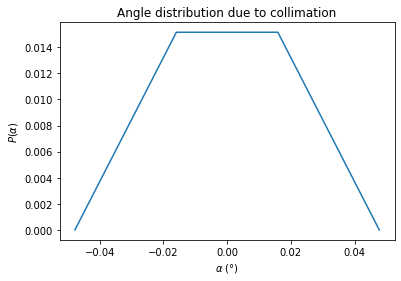

In [39]:
# Plot angle distribution
a.figP()

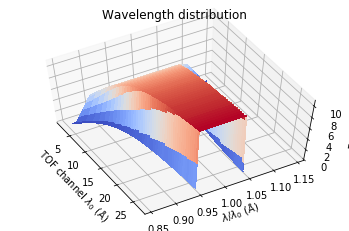

In [40]:
#Plot the chopper actual transmission for all channels
a.figD()

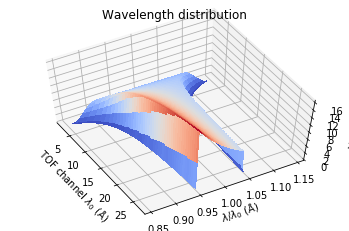

In [41]:
# Plot wavelength resolution:
a.figH()

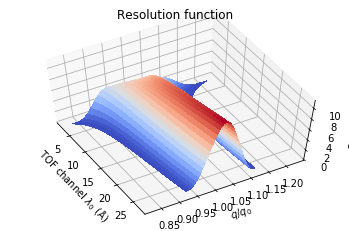

In [42]:
# Plot transfer vector resolution:
a.figR()

## 2. Data fitting with exact resolution function

**pytof** allows to fit TOF neutron reflectivity data. The fitting procedure takes into account the exact resolution function of the spectrometer. The fitting is based on the [lmfit](https://lmfit.github.io/lmfit-py/) python module.In this section, we present a quick view of the fitting capabilities.

### a) Building a fitting model
The **Layer** class respresents a single layer defined by its coherent scattering length density (SLD), its thichkness (d) and its roughness (sigma). To build the fitting model, one has to declare all the layers that will be used. Here, we assume only a substrate and a ambiant material (Fresnel Reflectivity)

In [43]:
air=pytof.Layer('air',sld=0,d=0,sigma=20)
quartz=pytof.Layer('quartz',sld=3.8,d=0,sigma=0)

The different layers are then put into a **Stack** class:

In [44]:
fresnel=pytof.Stack([air,quartz])

The **RefModel** object allows to put together the experiemental data and the stack model in order to perform data fitting. The computation of the resolution function is performed using the default configuration of HERMES and the metadata stored in the data file. The configuration can be set using the **res** attribute denoting the corresponding **tof** object (See section 1).

In [45]:
model=pytof.RefModel(data='SiO2_MR.txt',stack=fresnel)
model.res.update(chop_position=2, r1=1)

The fitting parameters are stored has a **parameters** attributes which is a [Parameters](https://lmfit.github.io/lmfit-py/parameters.html) object from [lmfit](https://lmfit.github.io/lmfit-py/) module. The parameters names, initial values can be viewed using the **show()** method 

In [46]:
model.show()

Name          Value  Vary   Min   Max Stderr
air_d             0 False     0 1e+06  None
air_sigma        20 False     0 1e+06  None
air_sld           0 False    -2   100  None
quartz_d          0 False     0 1e+06  None
quartz_sigma      0 False     0 1e+06  None
quartz_sld      3.8 False    -2   100  None


Each parameter property (min, max, value, vary) can be set using the following commands :

In [47]:
model.stack.parameters['quartz_sld'].value=3.3
model.stack.parameters['quartz_sld'].min=2
model.stack.parameters['quartz_sld'].max=5
model.stack.parameters['quartz_sld'].vary=True
model.stack.parameters['air_sigma'].vary=True


The **sim()** method allows to compute the reflectivity model which can be then plotted with the **plot()** method.The fit can be performed using the **fit(method='least_squares')** method. The available optimization algorythms are presented [here](https://lmfit.github.io/lmfit-py/fitting.html)
    

**Initial condition**

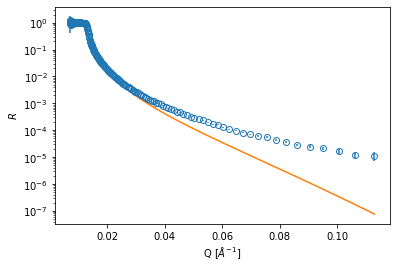

In [48]:
model.sim()
model.plot()

**after data fitting**

fit lasted 9.874854e-01 s
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 10
    # data points      = 240
    # variables        = 2
    chi-square         = 226.194326
    reduced chi-square = 0.95039633
    Akaike info crit   = -10.2186661
    Bayesian info crit = -3.25738824
[[Variables]]
    air_sld:       0 (fixed)
    air_d:         0 (fixed)
    air_sigma:     2.61138314 +/- 0.29266732 (11.21%) (init = 20)
    quartz_sld:    3.33684001 +/- 7.9011e-04 (0.02%) (init = 3.3)
    quartz_d:      0 (fixed)
    quartz_sigma:  0 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(air_sigma, quartz_sld) =  0.387


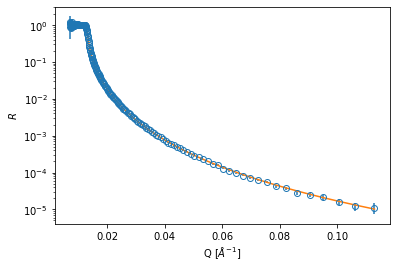

In [49]:
model.fit()
model.plot()

The fit can be saved as 2 columns text file ($Q$, $R$) with a header resuming the fitting parameters values and the fit goodness.

In [50]:
model.saveFitAsTxt('SiO2')